In [71]:
from PIL import Image, ImageOps

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
import matplotlib.pypl

In [2]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [3]:
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

In [4]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

In [92]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [7]:
from keras.preprocessing.image import ImageDataGenerator


In [21]:
train_dir = '/Users/eitan/Documents/Flatiron/Capstone/train'

test_dir = '/Users/eitan/Documents/Flatiron/Capstone/test'

In [30]:
train_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = .2)

In [37]:
train_generator = train_data_gen.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',

)

Found 4876 images belonging to 10 classes.


In [32]:
val_data_gen = ImageDataGenerator(rescale=1./255)

In [33]:
validation_generator = train_data_gen.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',

)

Found 1214 images belonging to 10 classes.


In [60]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [61]:
test_generator = test_data_gen.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                                                        # add shuffle = False

)


Found 2642 images belonging to 10 classes.


In [47]:
model = Sequential()

In [48]:
# define 3x3 filter window sizes. Create 32 filters.
model.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
# max pool in 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 73984)            

In [50]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [51]:
history_cnn = model.fit(train_generator,
                        validation_data = validation_generator,
                        epochs = 20,
         )

Epoch 1/20
153/153 [==============================] - 38s 245ms/step - loss: 1.8495 - accuracy: 0.3126 - val_loss: 1.7347 - val_accuracy: 0.3575
Epoch 2/20
153/153 [==============================] - 36s 235ms/step - loss: 1.4214 - accuracy: 0.4813 - val_loss: 1.6820 - val_accuracy: 0.4242
Epoch 3/20
153/153 [==============================] - 36s 237ms/step - loss: 1.1096 - accuracy: 0.6183 - val_loss: 1.5912 - val_accuracy: 0.4407
Epoch 4/20
153/153 [==============================] - 36s 236ms/step - loss: 0.8215 - accuracy: 0.7248 - val_loss: 1.7918 - val_accuracy: 0.5066
Epoch 5/20
153/153 [==============================] - 37s 239ms/step - loss: 0.6233 - accuracy: 0.7896 - val_loss: 1.7430 - val_accuracy: 0.5255
Epoch 6/20
153/153 [==============================] - 36s 235ms/step - loss: 0.4428 - accuracy: 0.8523 - val_loss: 1.8874 - val_accuracy: 0.5000
Epoch 7/20
153/153 [==============================] - 36s 237ms/step - loss: 0.3202 - accuracy: 0.8946 - val_loss: 2.3701 - val_ac

In [56]:
_, test_acc = model.evaluate(test_generator)

83/83 [==============================] - 13s 159ms/step - loss: 2.0601 - accuracy: 0.7286


In [62]:
train_cnn_history

,loss,accuracy,val_loss,val_accuracy
epochs,,,,
0,1.849478,0.312551,1.734672,0.357496
1,1.421442,0.481337,1.682026,0.424217
2,1.109635,0.618335,1.591166,0.440692
3,0.821450,0.724774,1.791784,0.506590
4,0.623300,0.789582,1.742965,0.525535
5,0.442765,0.852338,1.887387,0.500000
6,0.320198,0.894586,2.370144,0.497529
7,0.215537,0.929040,2.261196,0.523888
8,0.149079,0.952830,3.242773,0.522241


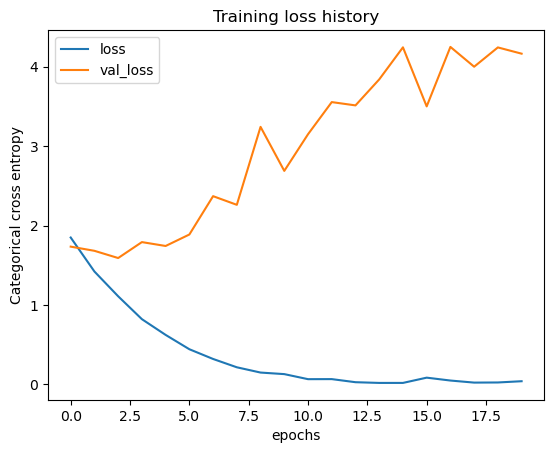

In [52]:
train_cnn_history = pd.DataFrame(history_cnn.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

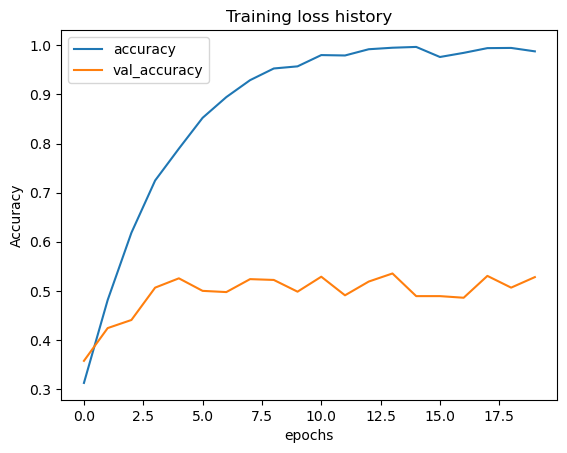

In [58]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

- typically we add dropout and L2 regularization after the convolutional layers

In [ ]:
#model.fit(
 #           train_generator,
  #          steps_per_epoch=2000 // batch_size,
   #         epochs=50,
    #        validation_steps=800 // batch_size)

#model.save_weights('first_try.h5') 

In [63]:
predictions = model.predict(test_generator)


83/83 [==============================] - 14s 164ms/step


In [65]:
predicted_labels = [np.argmax(pred) for pred in predictions]


In [67]:
true_labels = test_generator.classes


In [69]:
accuracy = np.mean(np.array(predicted_labels) == true_labels)
print("Accuracy:", accuracy)


Accuracy: 0.7286146858440575


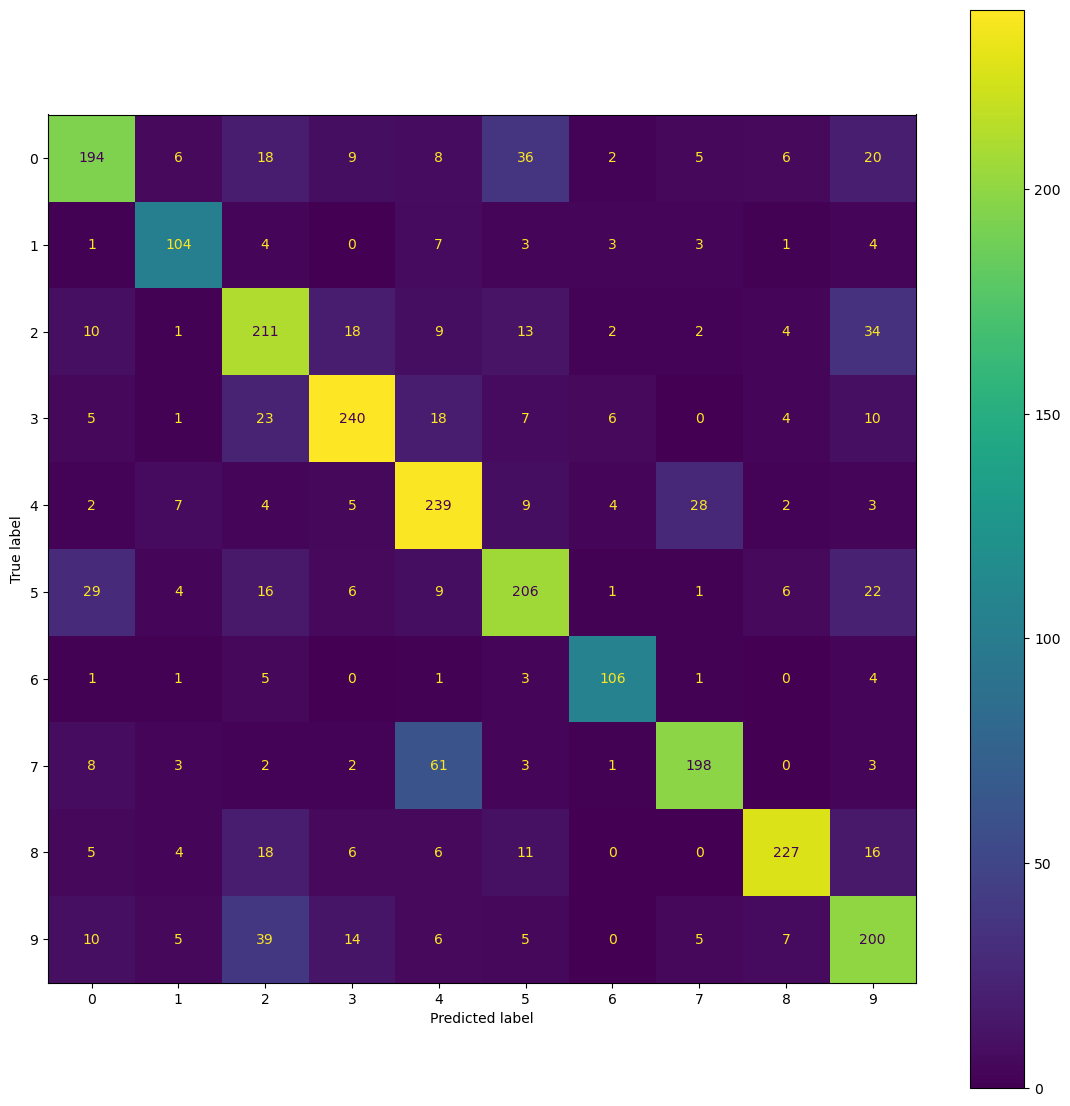

In [112]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax);

In [98]:
y_true true_labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [99]:
a= 0

In [100]:
a = class_labels[0]
a

'air_conditioner'

In [103]:
y_true_labeled = []

for label in true_labels:
    y_true_labeled.append(class_labels[label])
    

In [104]:
y_pred_labeled = []

for label in predicted_labels:
    y_pred_labeled.append(class_labels[label])
    

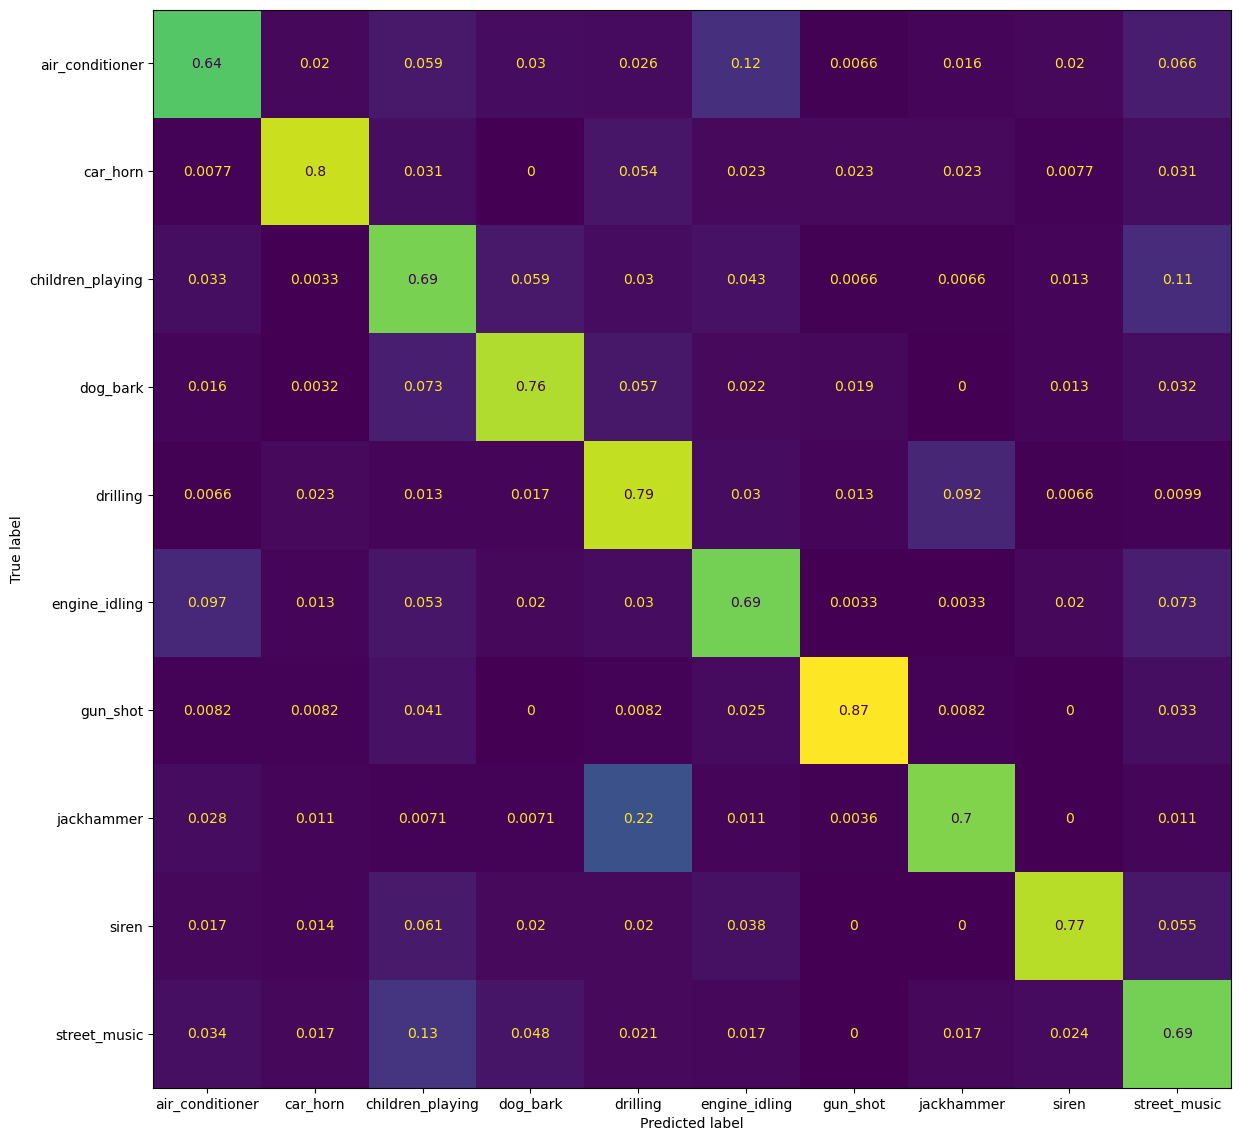

In [111]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(y_true_labeled, y_pred_labeled, 
                                        normalize = 'true', colorbar=False, labels = class_labels, ax = ax);

In [76]:
classID  class           
0        air_conditioner     1000
1        car_horn             429
2        children_playing    1000
3        dog_bark            1000
4        drilling            1000
5        engine_idling       1000
6        gun_shot             374
7        jackhammer          1000
8        siren                929
9        street_music        1000
dtype: int64

SyntaxError: invalid syntax (1278761112.py, line 1)

In [96]:
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 
               'gun_shot', 'jackhammer', 'siren', 'street_music']

In [77]:
# Step 6: Compare predictions with ground truth labels
correctly_classified_samples = []
misclassified_samples = []

for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
        correctly_classified_samples.append(i)
    else:
        misclassified_samples.append(i)

# Step 7: Print the results
print("Correctly Classified Samples:")
for idx in correctly_classified_samples:
    print("Sample:", idx, "True Label:", true_labels[idx], "Predicted Label:", predicted_labels[idx])

print("\nMisclassified Samples:")
for idx in misclassified_samples:
    print("Sample:", idx, "True Label:", true_labels[idx], "Predicted Label:", predicted_labels[idx])


Correctly Classified Samples:
Sample: 23 True Label: 0 Predicted Label: 0
Sample: 44 True Label: 0 Predicted Label: 0
Sample: 46 True Label: 0 Predicted Label: 0
Sample: 48 True Label: 0 Predicted Label: 0
Sample: 54 True Label: 0 Predicted Label: 0
Sample: 55 True Label: 0 Predicted Label: 0
Sample: 56 True Label: 0 Predicted Label: 0
Sample: 57 True Label: 0 Predicted Label: 0
Sample: 61 True Label: 0 Predicted Label: 0
Sample: 62 True Label: 0 Predicted Label: 0
Sample: 63 True Label: 0 Predicted Label: 0
Sample: 64 True Label: 0 Predicted Label: 0
Sample: 66 True Label: 0 Predicted Label: 0
Sample: 71 True Label: 0 Predicted Label: 0
Sample: 72 True Label: 0 Predicted Label: 0
Sample: 73 True Label: 0 Predicted Label: 0
Sample: 74 True Label: 0 Predicted Label: 0
Sample: 75 True Label: 0 Predicted Label: 0
Sample: 76 True Label: 0 Predicted Label: 0
Sample: 77 True Label: 0 Predicted Label: 0
Sample: 78 True Label: 0 Predicted Label: 0
Sample: 79 True Label: 0 Predicted Label: 0
Sa